In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
fish_df=pd.read_csv('..\\Fish.csv')
fish_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In this notebook we will try to predict fish Species by it's space and weight dimensions, so what we are building is a multiclass classifier. It's important to make sure that we got at least one example of each class in train - otherwise how would we make predictions ?
One way is to use StratifiedShuffleSplit

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
X = fish_df.drop("Species", axis = 1)
y= fish_df.Species
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.4, random_state = 423)
train_ind, test_ind = list(sss.split(X, y))[0]
x_train = X.iloc[train_ind]; x_test = X.iloc[test_ind]
y_train = y.iloc[train_ind]; y_test = y.iloc[test_ind]

print(f"train shape: {x_train.shape}")
print(f"test shape: {x_test.shape}")

train shape: (95, 6)
test shape: (64, 6)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

baseline_pipe = make_pipeline(StandardScaler(), LogisticRegression())


In [30]:
from sklearn.metrics import classification_report, f1_score

def evaluate_pipe(pipe):
    pipe.fit(x_train, y_train)
    preds = pipe.predict(x_test)
    preds_train = pipe.predict(x_train)
    return (f1_score(y_train, preds_train, average = 'weighted'),
            f1_score(y_test, preds, average = 'weighted'))

def print_ev_pipe(pipe):
    train_f1, test_f1 = evaluate_pipe(pipe)
    print(f"Train f1: {train_f1}")    
    print(f"Test f1: {test_f1}")
# micro - add up TP, TN, FP from all classes

print_ev_pipe(baseline_pipe)

Train f1: 0.7560964789788984
Test f1: 0.7631042179802956


Let's try to add L2 regularization to our model.

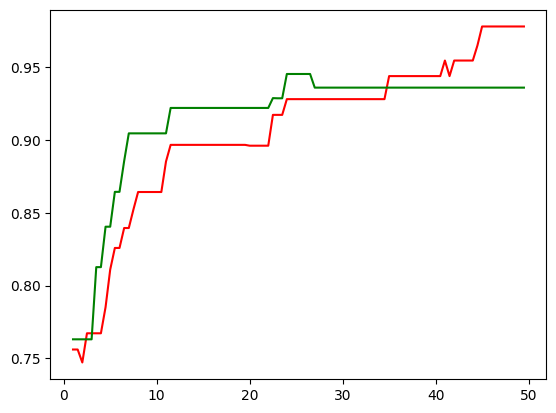

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', module="matplotlib")
train_scs = []; test_scs = []
start_alpha = 1; lim_alpha = 50
for i in range(start_alpha * 1000, lim_alpha * 1000, 500):
    alpha = float(i) / 1000
    pipe = make_pipeline(StandardScaler(), LogisticRegression(penalty="l2", C = alpha))
    train_f1, test_f1 = evaluate_pipe(pipe)
    train_scs.append(train_f1); test_scs.append(test_f1)
plt.plot([float(i) / 1000 for i in range(start_alpha * 1000, lim_alpha * 1000, 500)], train_scs, color = 'red')
plt.plot([float(i) / 1000 for i in range(start_alpha * 1000, lim_alpha * 1000, 500)], test_scs, color = 'green')

### Support Vector Machine

In [36]:
from sklearn.svm import SVC
pipe_svc = make_pipeline(StandardScaler(), SVC())
print_ev_pipe(pipe_svc)

Train f1: 0.6843177213998902
Test f1: 0.7243534482758621
